# **Getting Started🚀**

Let’s make sure GPU access is enabled! Run the `nvidia-smi` command to check. If there are any issues, go to `Edit -> Notebook settings -> Hardware accelerator`, select GPU, and click Save. Then, you’ll be set to check the GPU details.

In [1]:
!nvidia-smi

Wed Oct 30 10:50:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--


Next, let’s create our home directory.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content



Let's install YOLOv8! Run the following command:

In [3]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


Let’s import YOLO and the necessary image processing libraries:

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

Next, let’s import your labeled dataset from Roboflow. Replace the code below with your dataset details:

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="C0MDT8qV0WpRoMq9oWXz")
project = rf.workspace("uta-in2tq").project("test-p8orl")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Test-1 in yolov8:: 100%|██████████| 114/114 [00:00<00:00, 6179.89it/s]


# **Training The Dataset⛳**
This command trains a YOLOv8 segmentation model using the specified dataset and parameters. You can adjust various settings such as the number of epochs, image size, and model architecture to fine-tune the training process for better results!

For more details on additional hyperparameters, check out the [train settings](https://docs.ultralytics.com/modes/train/#train-settings).

In [10]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml lr0=0.01 lrf=0.01 epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.3.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Test-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N


Once the training is complete, you can view the `confusion_matrix` by running the code below. A confusion matrix helps you evaluate your model's performance, highlighting areas where it excels and where improvements may be needed.

/content


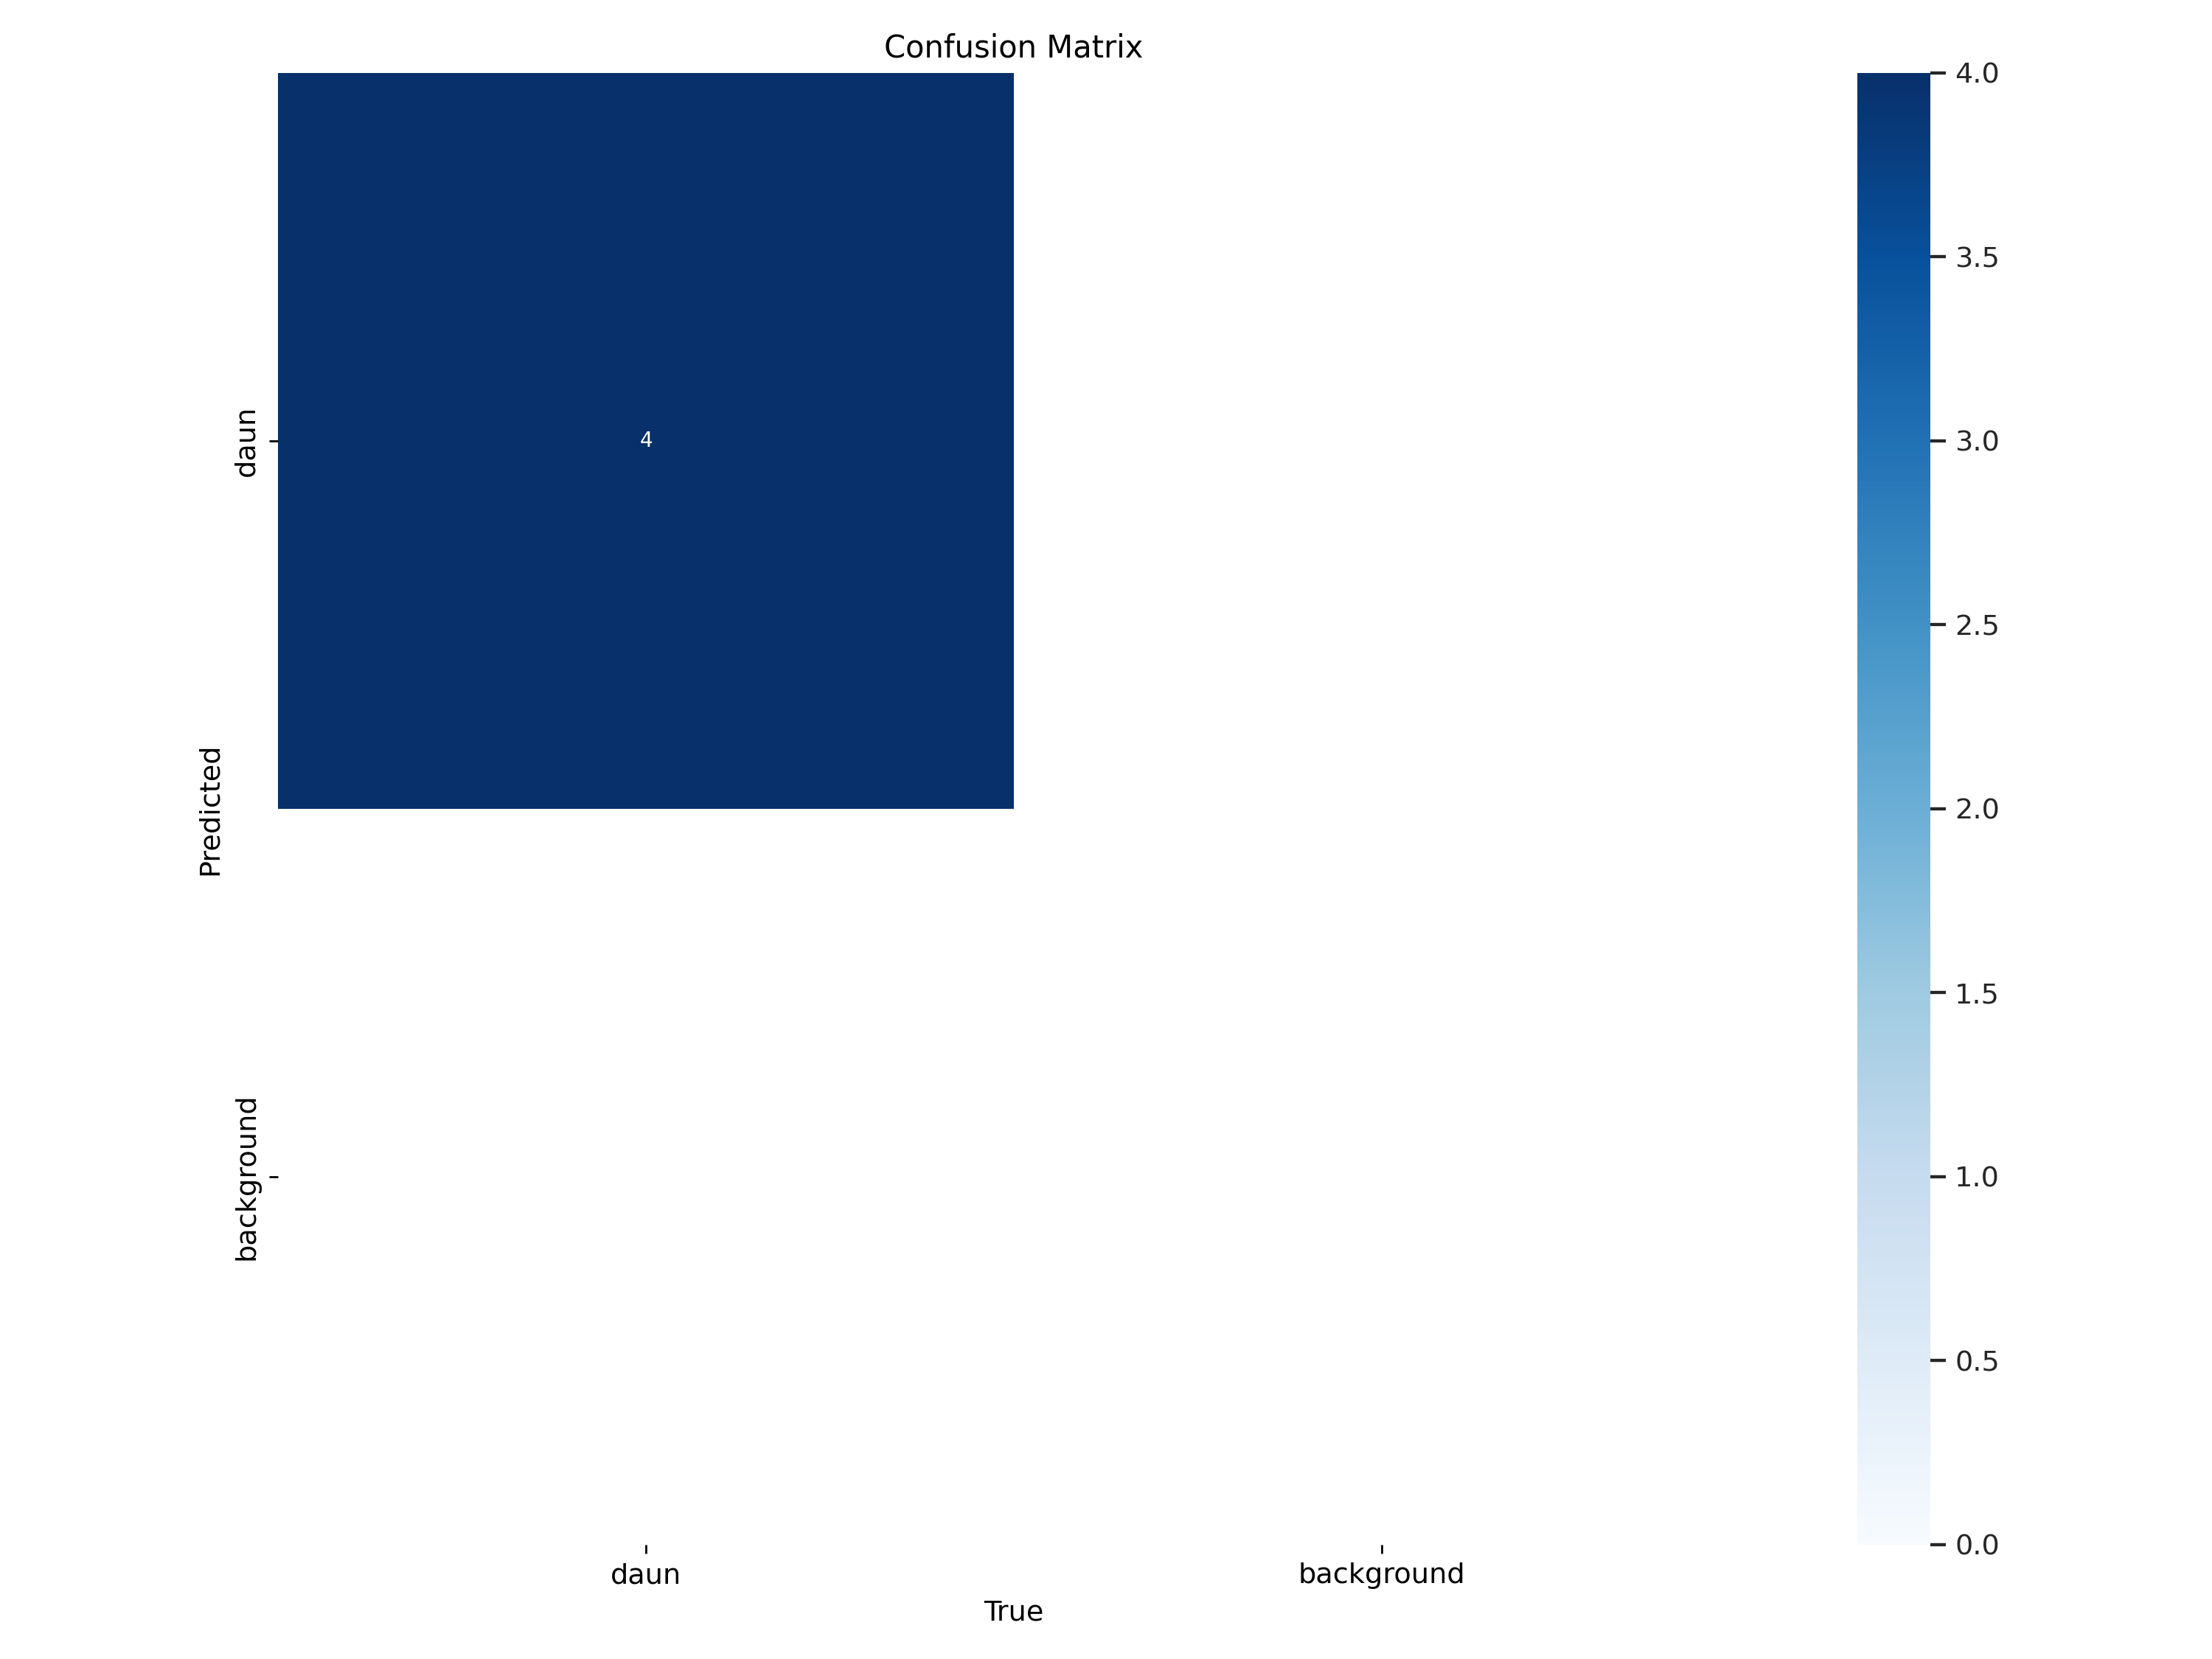

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)


`results`, which summarizes the overall training results and performance metrics of your YOLOv8 instance segmentation model.

/content


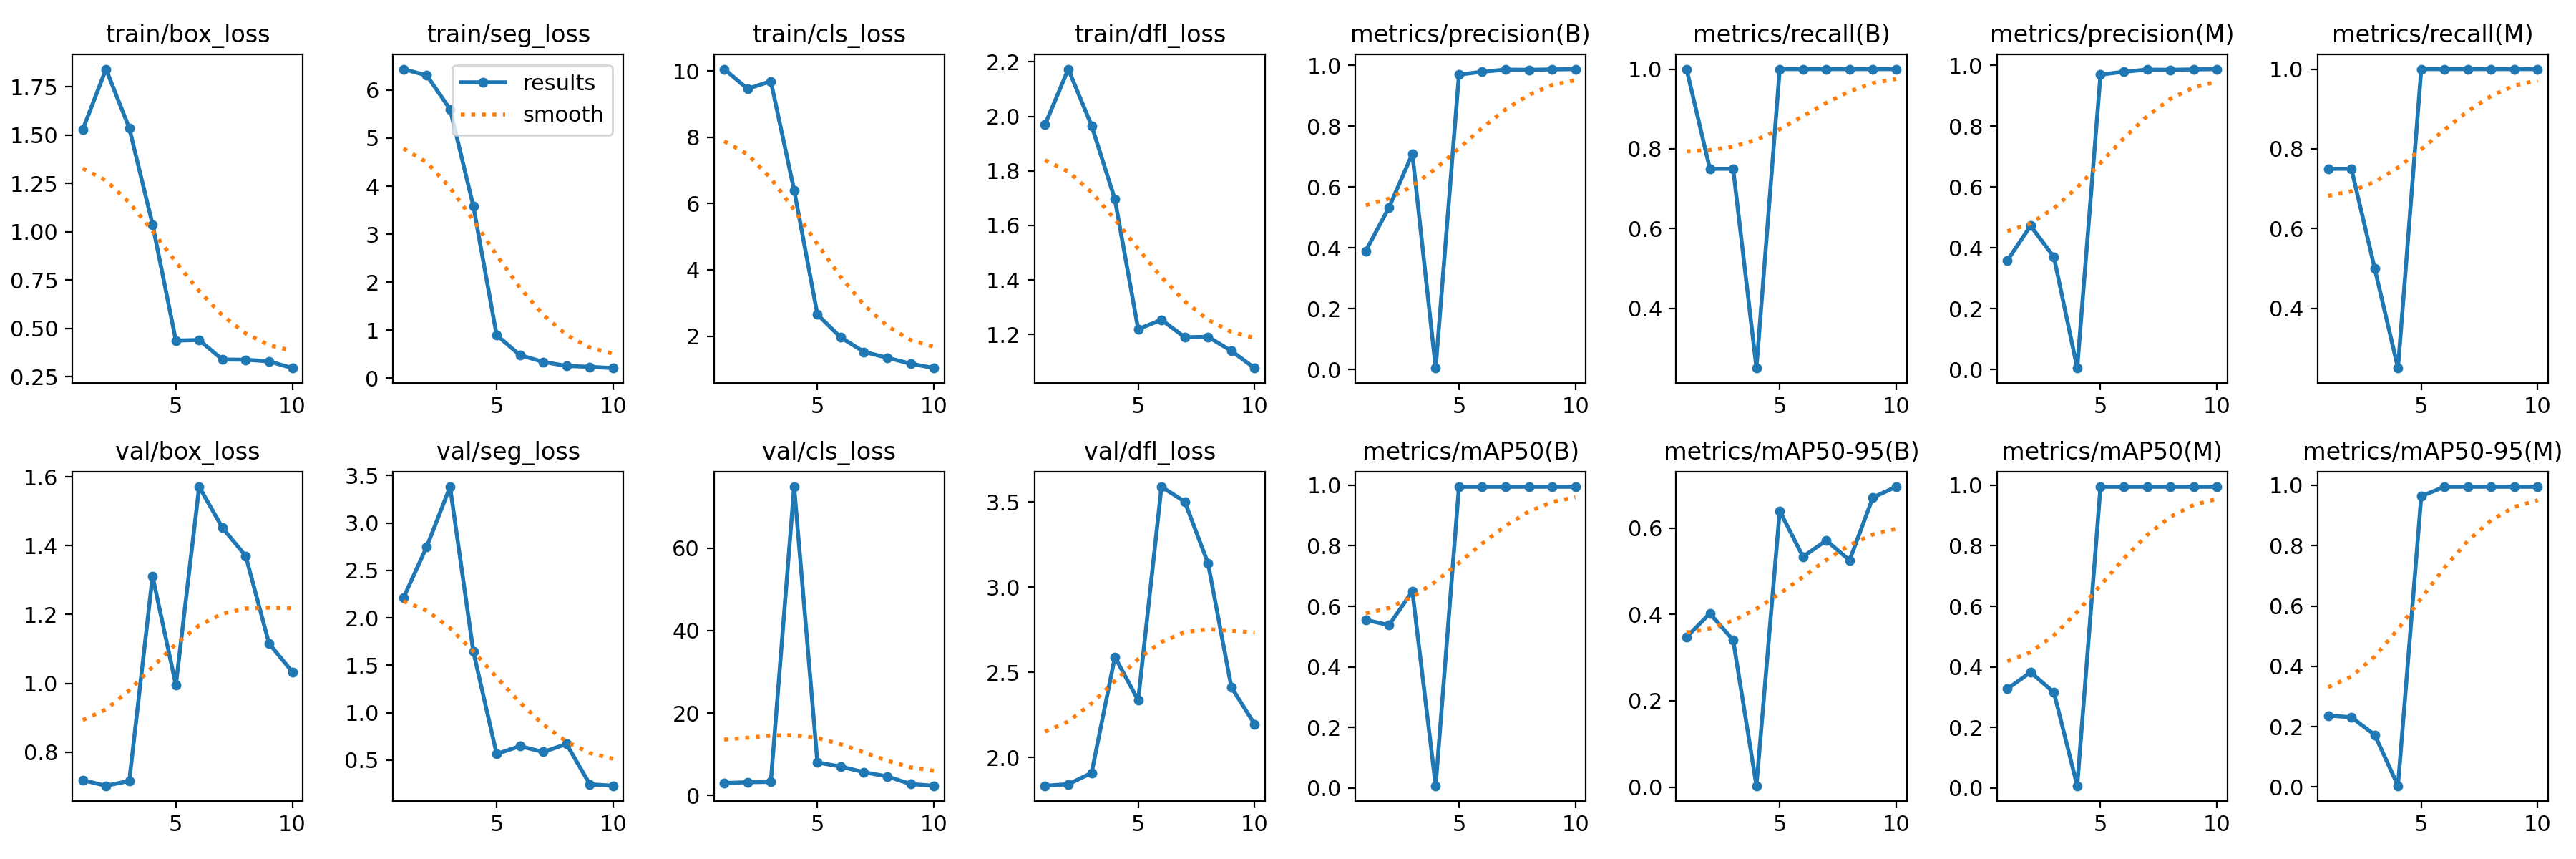

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

`val_batch0_pred.jpg` shows a sample prediction from the validation dataset, illustrating the model's performance on unseen data.

/content


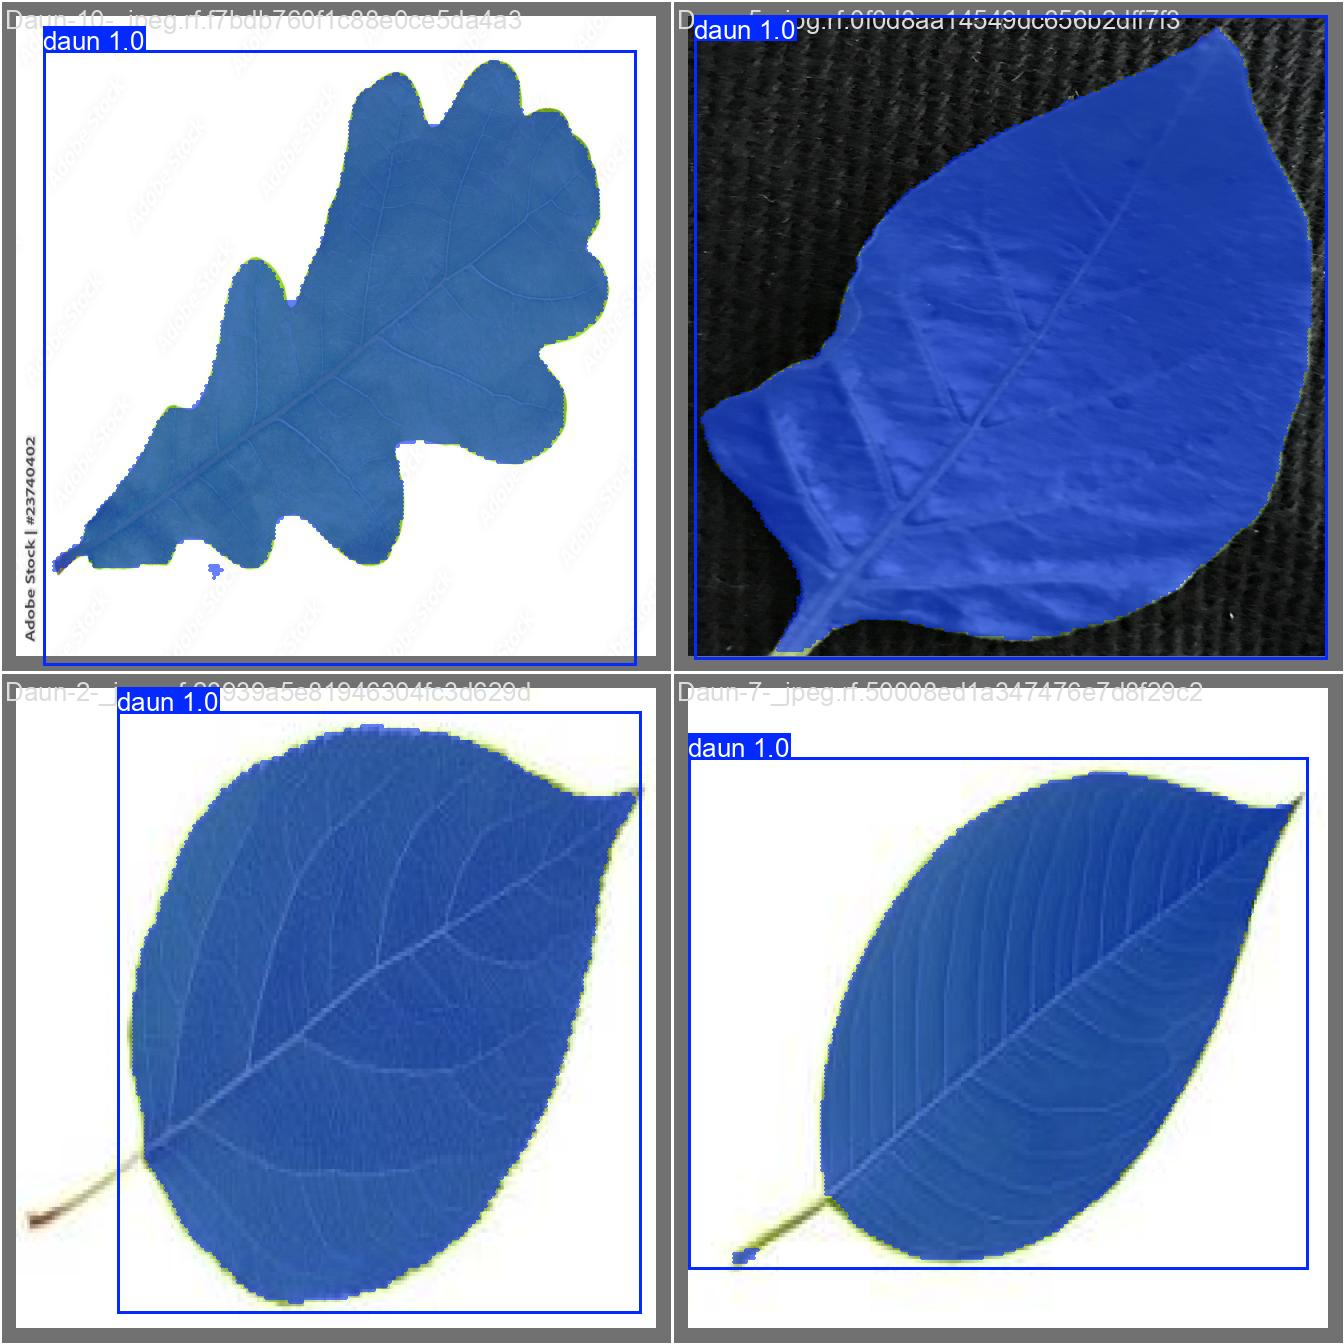

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)


Lastly, we need to validate the training results. Validation is essential for ensuring that your model learns effectively from the training data and performs well on new data, resulting in a more robust and reliable machine learning model!

In [14]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Test-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.12it/s]
                   all          4          4      0.988          1      0.995      0.696      0.988          1      0.995      0.995
Speed: 0.5ms preprocess, 34.6ms inference, 0.0ms loss, 139.3ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Once you have completed training your YOLOv8 model, you will have a set of trained weights ready for use. These weights can be found in the `runs/segment/train/weights/best.pt` folder of your project. Download the weights, and you can deploy them in your image processing program!